In [553]:
%matplotlib inline
%env CUDA_VISIBLE_DEVICES = 1

env: CUDA_VISIBLE_DEVICES=1


In [647]:
%run mylibrary.ipynb

env: CUDA_VISIBLE_DEVICES=1


In [604]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import math
import random

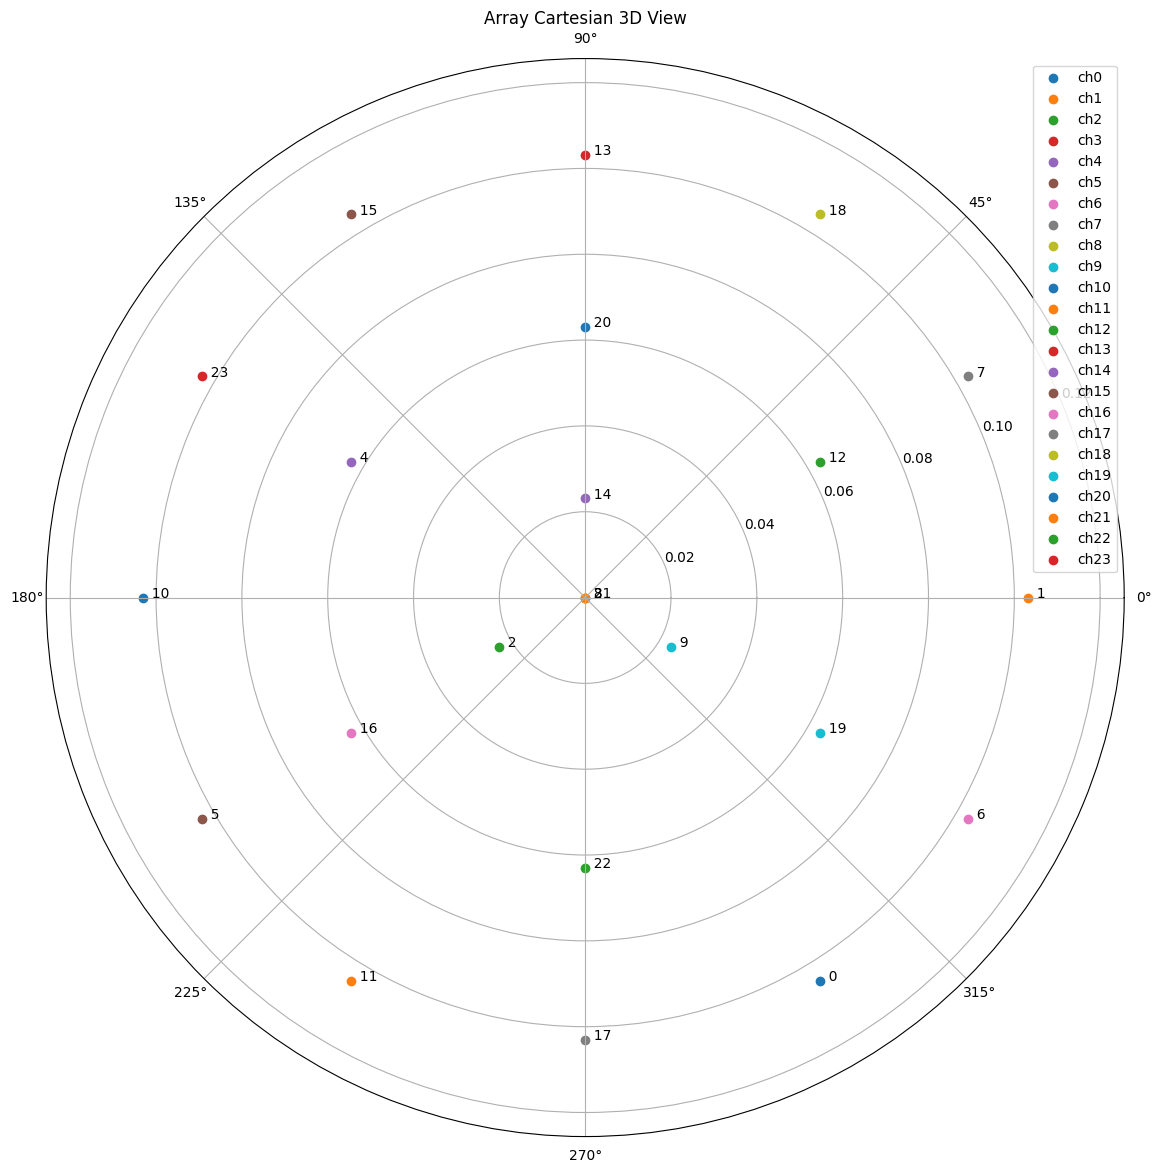

In [605]:
geometry = pd.read_csv('../AA_geometry.tsv', header=None, sep='\t')
AA_Geometry = geometry.to_numpy()
visualizer = Visualizer(AA_Geometry)
visualizer.polar()

In [606]:
class MyModel(tf.keras.Model):
    # Todo
    # Include: batch normalization
    def __init__(self, n_channels):
        super().__init__()
        self.net = tf.keras.Sequential([
            tf.keras.layers.Input(n_channels),
            tf.keras.layers.Dense(units=16, activation='relu'),
            tf.keras.layers.Dense(units=8, activation='relu'),
            tf.keras.layers.Dense(units=1, activation = 'linear')
        ])

    def call(self, inputs):
        return self.net(inputs)

In [607]:
def genRandomAA(num_channels, list_length):
    list_channels = np.empty([list_length, num_channels], dtype=int)
    for i in range(list_length):
        list_channels[i] = random.sample(range(0,24), num_channels)
    return list_channels

In [608]:
# Extract data from files
data = DataExtract("../data/rss45/", 24)
inputs = data.get_delays()
labels = data.get_angles()

['random_signal_source_info_0.dat', 'random_signal_source_info_1.dat', 'random_signal_source_info_2.dat', 'random_signal_source_info_3.dat', 'random_signal_source_info_4.dat']
['random_signal_source_info_0_tau.bin', 'random_signal_source_info_1_tau.bin', 'random_signal_source_info_2_tau.bin', 'random_signal_source_info_3_tau.bin', 'random_signal_source_info_4_tau.bin']


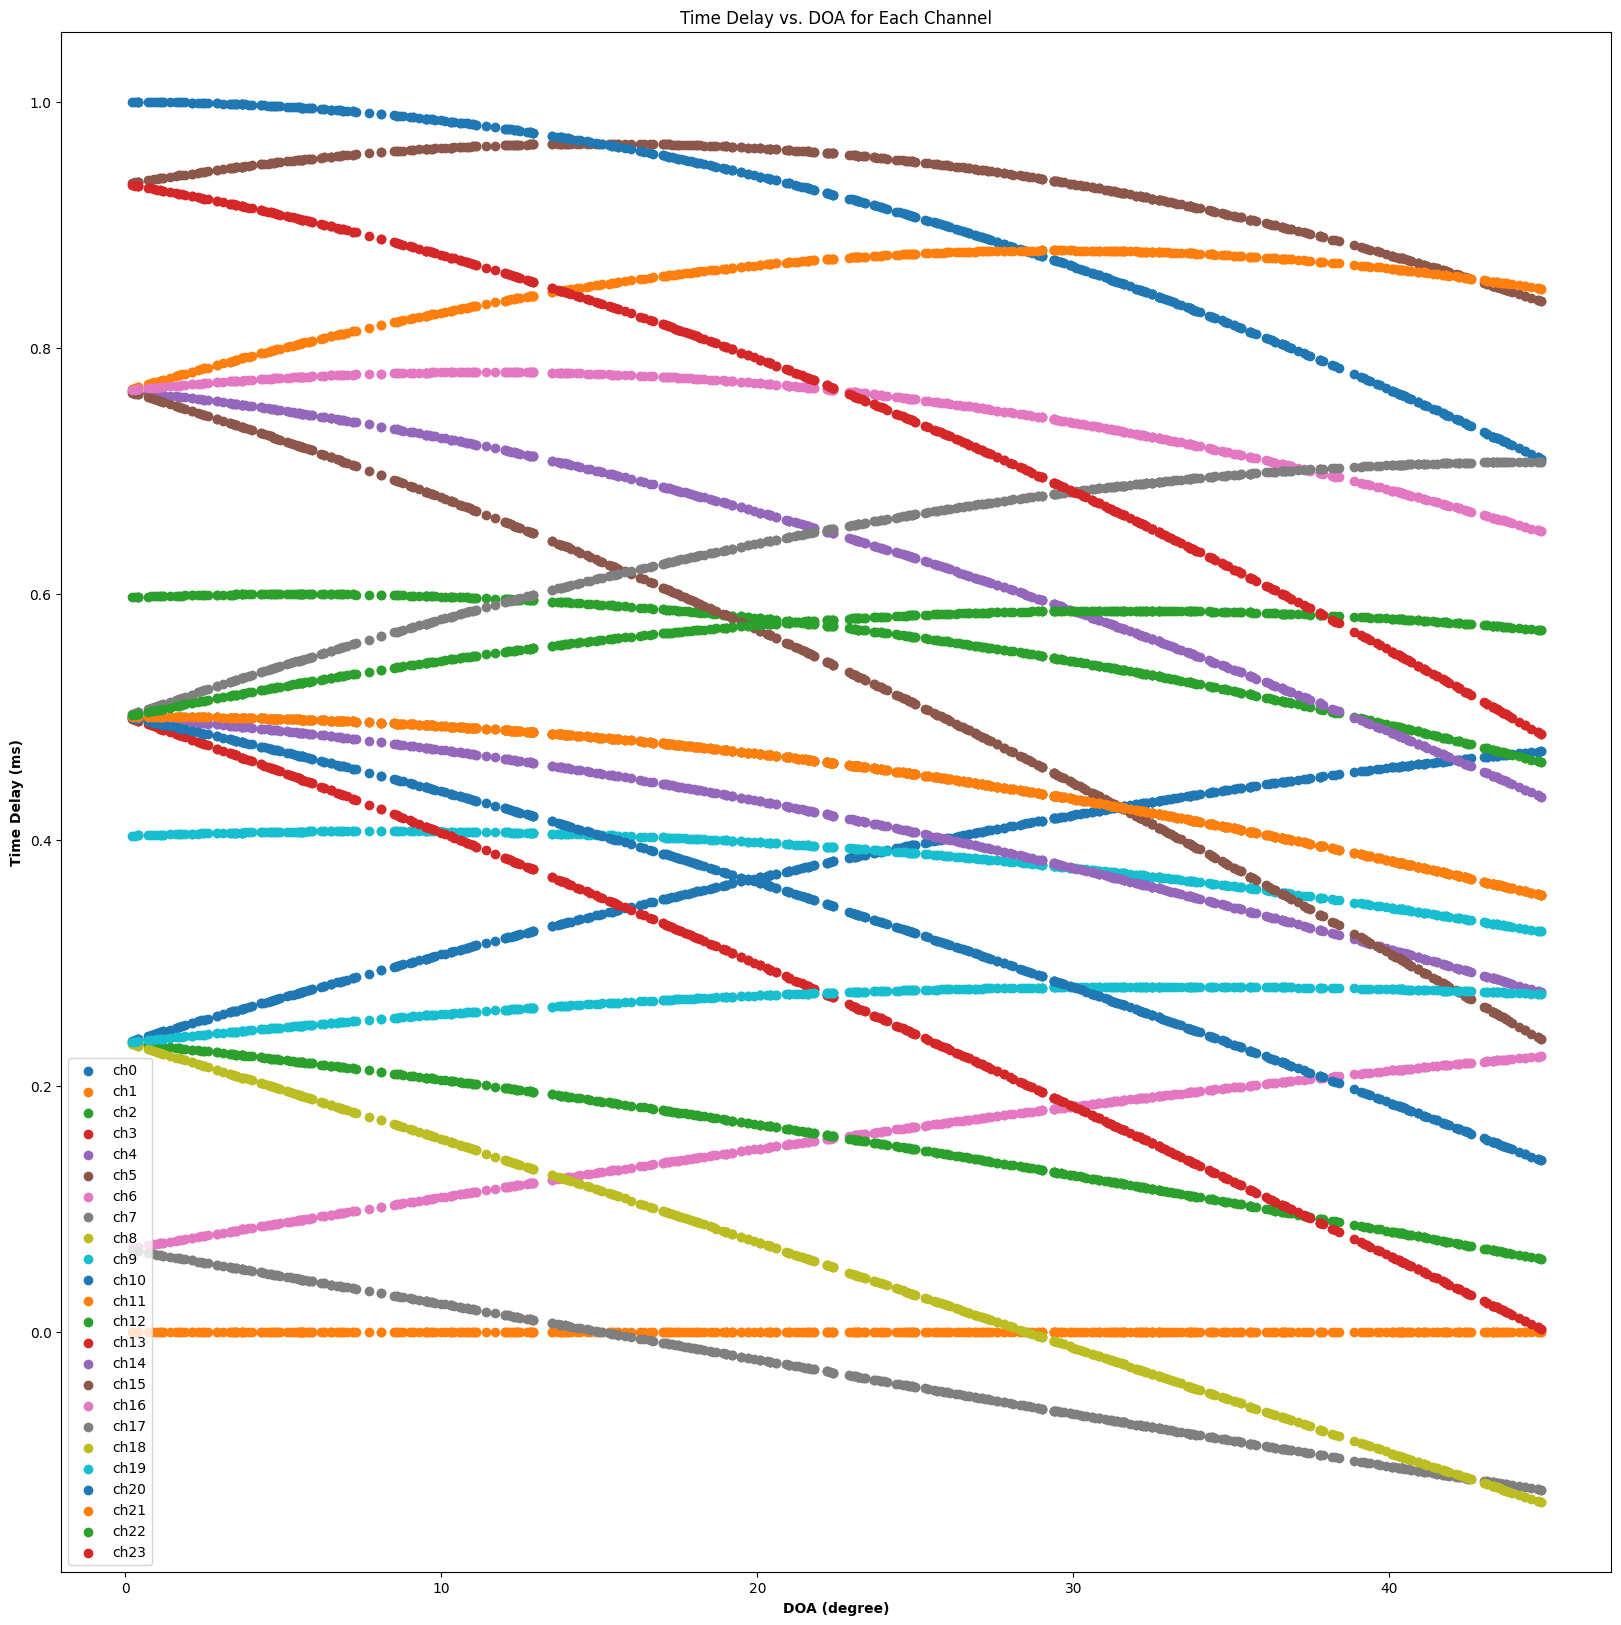

In [609]:
dataset = DataSetPacker(inputs, labels)
dataset.plot()

In [ ]:
list_channels = genRandomAA(4,4)

[0.01499132439494133, 0.01499132439494133, 0.09651128947734833]
[0.009925018064677715, 0.009925018064677715, 0.08028107136487961]
[0.016839362680912018, 0.016839362680912018, 0.09970381110906601]
[118.23350524902344, 118.23350524902344, 9.53765869140625]


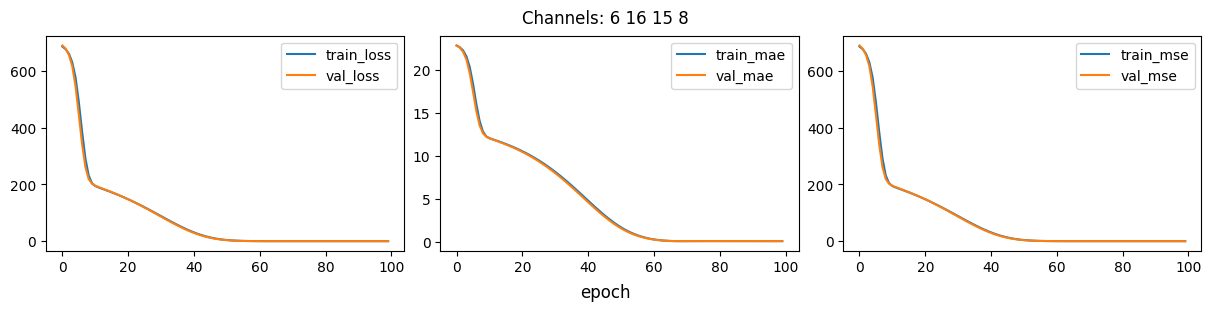

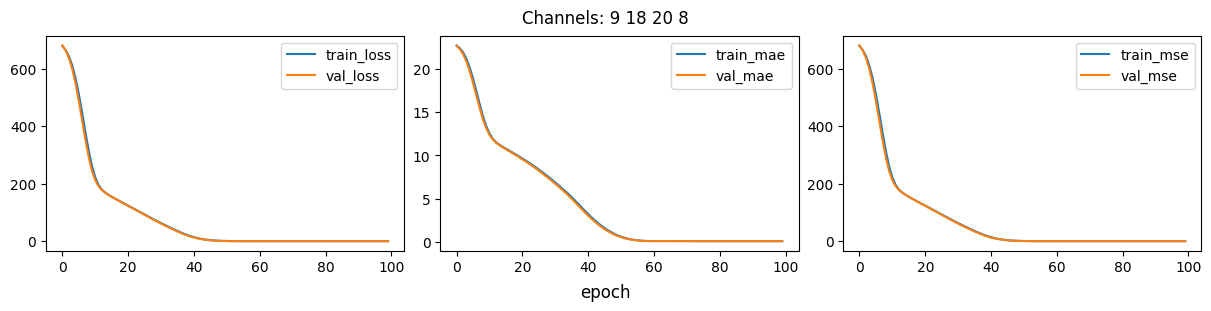

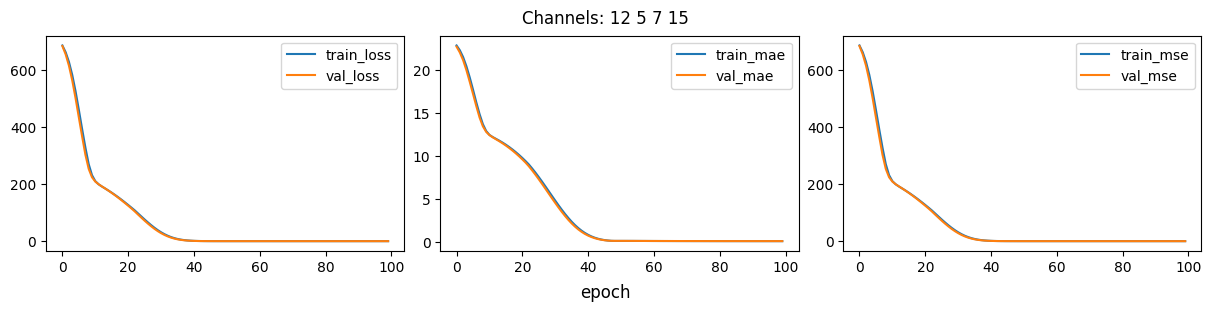

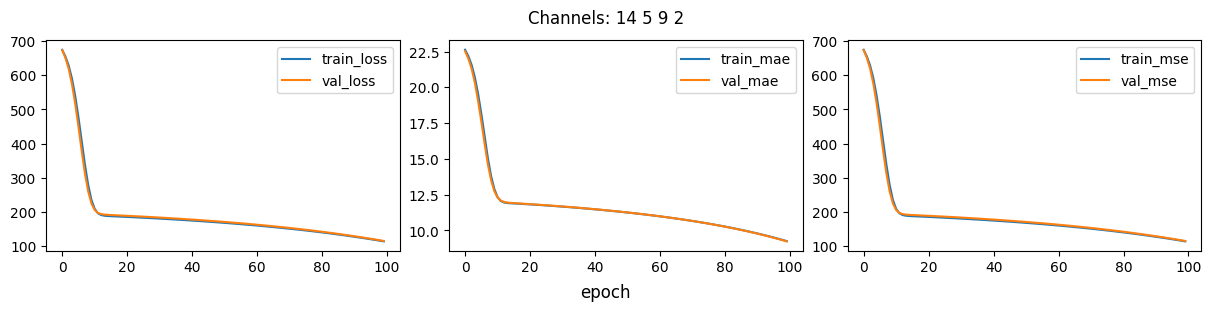

In [648]:
for channels in list_channels:
    dataset = DataSetPacker(inputs, labels, channels)
    train_dataset, val_dataset, test_dataset = dataset.split(shuffle=False)
    model = MyModel(np.shape(channels))
    model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
    losses = model.fit(train_dataset.batch(8), epochs=100, validation_data = val_dataset.batch(8), verbose=False)
    EvaluateModel.plot_history(losses, channels)
    EvaluateModel.evaluate(model, test_dataset, True)
    

In [ ]:
channel_id = [9,18,20,8]
dataset = DataSetPacker(inputs, labels, channel_id)
dataset.plot()
train_dataset, val_dataset, test_dataset = dataset.split()
model = MyModel(np.shape(channel_id))
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
losses = model.fit(train_dataset.batch(8), epochs=100, validation_data = val_dataset.batch(8))

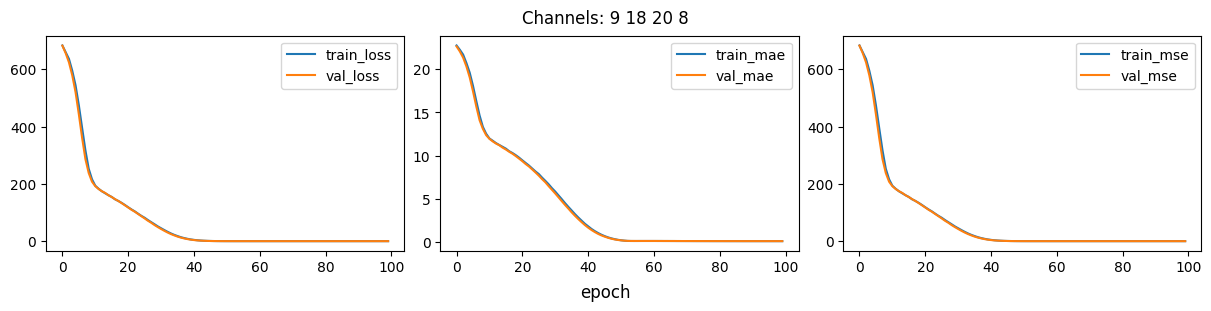

In [640]:
EvaluateModel.plot_history(None,losses, channel_id)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


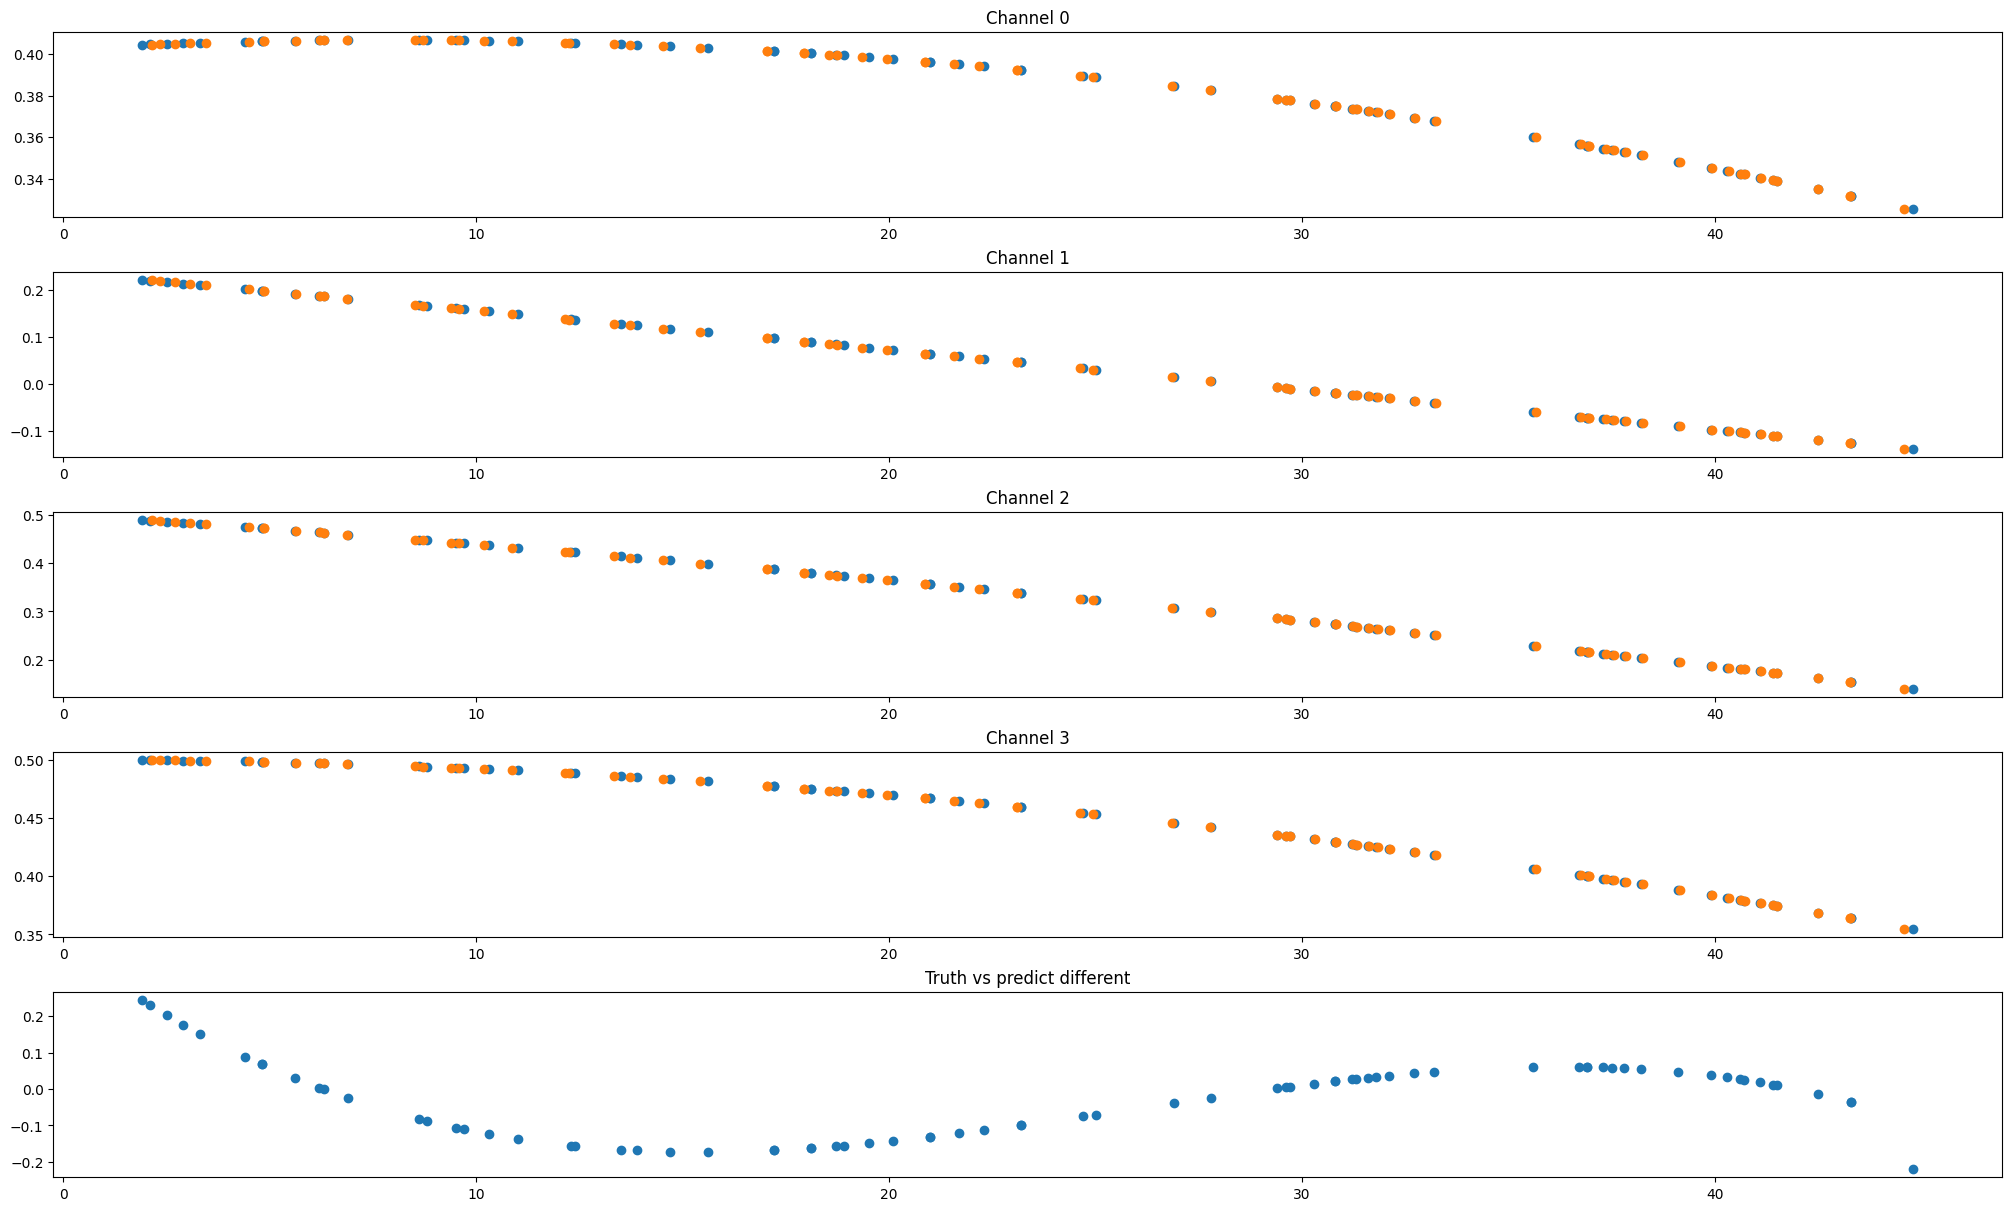

In [641]:
EvaluateModel.plot_evaluation(None, model, channel_id, test_dataset)

In [ ]:
x = test_dataset.take(1)

i, label=list(x.as_numpy_iterator())[0][0], list(x.as_numpy_iterator())[0][1]

i = i.reshape(-1,4)

model.predict(i), label

model.evaluate(test_dataset.batch(100))